In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data from CSV file
data = pd.read_csv('../../../Dataset/ADBE_Stock.csv')

# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,1/2/2019,ADBE,224.570007,224.570007,226.169998,219.000000,219.910004,2784100
1,1/3/2019,ADBE,215.699997,215.699997,223.630005,215.149994,220.880005,3663500
2,1/4/2019,ADBE,226.190002,226.190002,227.649994,217.479996,219.839996,4043400
3,1/7/2019,ADBE,229.259995,229.259995,232.600006,227.289993,229.949997,3638500
4,1/8/2019,ADBE,232.679993,232.679993,233.770004,228.330002,232.649994,3685900
...,...,...,...,...,...,...,...,...
1311,3/19/2024,ADBE,521.190002,521.190002,522.679993,508.989990,509.890015,7081800
1312,3/20/2024,ADBE,519.140015,519.140015,523.869995,512.500000,523.289978,4239600
1313,3/21/2024,ADBE,511.250000,511.250000,519.729981,506.200012,517.599976,5206600
1314,3/22/2024,ADBE,499.519989,499.519989,511.589996,496.670013,509.070007,5410300


In [3]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5759.686, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5788.103, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5765.102, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5767.762, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5787.004, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5767.157, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5767.258, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5762.871, Time=1.00 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5768.473, Time=0.79 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5765.440, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5767.877, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5768.745, Time=0.40 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5758.733, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [6]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[478.18365162 479.04555041 477.13163338 479.62014626 477.10634278
 479.14055092 477.94945906 478.13522805 478.90137507 477.42223395
 479.25441144 477.46731976 478.85607671 478.10744354 478.12392769
 478.77694376 477.64529286 478.98620653 477.72297968 478.66294832
 478.20505867 478.13274003 478.67305178 477.81492857 478.79066546
 477.90299647 478.53304995 478.26338099 478.15120783 478.58840279]


In [7]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 100.96893676620267
Testing RMSE: 105.77113867191788


Validation RMSE: 100.96893676620267
Testing RMSE: 105.77113867191788


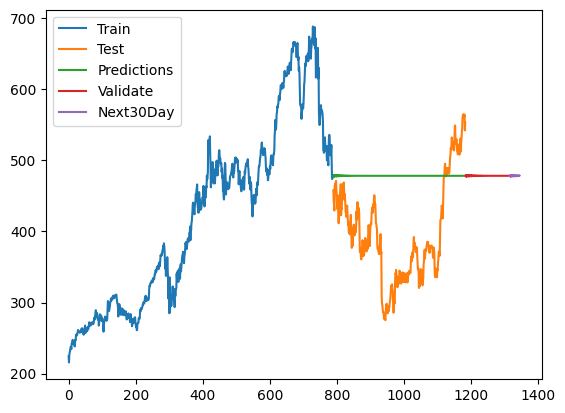

In [8]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [9]:
test_data.index

RangeIndex(start=789, stop=1183, step=1)

In [10]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val) ** 2))
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
valid_mape = calculate_mape(y_val, y_pred_val)
test_mape = calculate_mape(y_test, y_pred)
valid_mda = calculate_mda(y_val, y_pred_val)
test_mda = calculate_mda(y_test, y_pred)

# In kết quả
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
print('Validation MDA:', valid_mda)
print('Testing MDA:', test_mda)

Validation RMSE: 100.96893676620267
Testing RMSE: 105.77113867191788
Validation MAPE: 15.951232116082236
Testing MAPE: 26.062501685548717
Validation MDA: 51.515151515151516
Testing MDA: 48.346055979643765
